In [1]:
import pandas as pd

IMPORT DATA

In [2]:
db = pd.read_csv("../data/collegeinsight_data_nolabel_ICs_by_year.csv", encoding= 'unicode_escape')
db

C:\Users\ranyk\AppData\Local\Temp\ipykernel_31032\1568950977.py:1: DtypeWarning: Columns (7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv("../data/collegeinsight_data_nolabel_ICs_by_year.csv", encoding= 'unicode_escape')


,data_yr_string,entity_id,entity_type,name,city,state,state_fips,cong_dist,webaddr,sector,...,compl_rpy_7yr_n,noncom_rpy_7yr_n,dep_rpy_7yr_n,ind_rpy_7yr_n,pell_rpy_7yr_n,nopell_rpy_7yr_n,female_rpy_7yr_n,male_rpy_7yr_n,firstgen_rpy_7yr_n,notfirstgen_rpy_7yr_n
0,2000-01,111100654,1,ALABAMA A & M UNIVERSITY,NORMAL,AL,1.0,NaN,WWW.AAMU.EDU,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01,111100663,1,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,1.0,NaN,www.uab.edu,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01,111100706,1,UNIVERSITY OF ALABAMA IN HUNTSVILLE,HUNTSVILLE,AL,1.0,NaN,www.uah.edu,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01,111100724,1,ALABAMA STATE UNIVERSITY,MONTGOMERY,AL,1.0,NaN,www.alasu.edu,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01,111100751,1,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,1.0,NaN,www.ua.edu,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139144,2018-19,9939999999,8,Nation - Less-than-2-year,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139145,2018-19,9991999999,9,Nation - Public,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139146,2018-19,9992999999,9,"Nation - Private, nonprofit",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139147,2018-19,9993999999,9,"Nation - Private, for-profit",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CLEAN DATA

In [3]:
#db[['data_yr_string', 'name']]

pred_data = ['coa_tuit_fees_d', 'coa_books_supp_d', 'coa_on_room_board_d']

db['name'] = db['name'].str.upper() # make all names uppercase

db = db[['name', 'data_yr_string'] + pred_data] # select only the columns we need

for dat in pred_data:
    db = db[db[dat].notnull()] # remove rows with null values


yrs = sorted(list(set(db['data_yr_string'])))
print(sorted(yrs))
colleges = list(db[db['data_yr_string'] == yrs[0]]['name'])

#print(colleges)
print([("YALE" in x) for x in colleges if "YALE" in x])

for yr in yrs[1:]:
    col = list(db[db['data_yr_string'] == yr]['name'])

    colleges = [x for x in colleges if x in col]


print(len(colleges))

db = db[[x in colleges for x in db['name']]]


#db[db['data_yr_string'] == yrs[0] and db['name'] == "YALE UNIVERSITY"]



['2000-01', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19']
[]
1453


Check entries

In [4]:
db[db['name'] == "UNIVERSITY OF CONNECTICUT"]

,name,data_yr_string,coa_tuit_fees_d,coa_books_supp_d,coa_on_room_board_d
1946,UNIVERSITY OF CONNECTICUT,2000-01,5596.0,725.0,6062.0
11462,UNIVERSITY OF CONNECTICUT,2003-04,6800.0,725.0,6888.0
19207,UNIVERSITY OF CONNECTICUT,2004-05,7490.0,725.0,7404.0
26929,UNIVERSITY OF CONNECTICUT,2005-06,7912.0,725.0,7848.0
34682,UNIVERSITY OF CONNECTICUT,2006-07,8362.0,726.0,8266.0
42440,UNIVERSITY OF CONNECTICUT,2007-08,8852.0,726.0,8850.0
50336,UNIVERSITY OF CONNECTICUT,2008-09,9338.0,800.0,9504.0
58324,UNIVERSITY OF CONNECTICUT,2009-10,9886.0,800.0,10120.0
66593,UNIVERSITY OF CONNECTICUT,2010-11,10416.0,800.0,10782.0
74990,UNIVERSITY OF CONNECTICUT,2011-12,10670.0,850.0,11050.0


Reorganize data into separate dataframes for training

In [7]:
import warnings
warnings.simplefilter(action='ignore')

years = [int(x.split("-")[0]) for x in yrs]

columns = ["name"] + years
print(columns)

tuition_db = pd.DataFrame(columns = columns)
tuition_db['name'] = colleges

supplies_db = tuition_db.copy()

room_db = tuition_db.copy()


for i in range(len(colleges)):
    c_db = db[db['name'] == colleges[i]]
    
    tuition = [c_db[c_db['data_yr_string'] == x]['coa_tuit_fees_d'].values[0] for x in yrs]
    supplies = [c_db[c_db['data_yr_string'] == x]['coa_books_supp_d'].values[0] for x in yrs]
    room = [c_db[c_db['data_yr_string'] == x]['coa_on_room_board_d'].values[0] for x in yrs]
    
    for yr in years:
        tuition_db.loc[i, yr] = tuition[years.index(yr)]
        supplies_db.loc[i, yr] = supplies[years.index(yr)]
        room_db.loc[i, yr] = room[years.index(yr)]

    print(f"{i+1} / {len(colleges)}", end = "\r")



['name', 2000, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


KeyboardInterrupt: 

Save the dataframes to csv files

In [ ]:
tuition_db.to_csv("../data/tuition_db.csv")
supplies_db.to_csv("../data/supplies_db.csv")
room_db.to_csv("../data/room_db.csv")

Load the dataframes from csv files

In [15]:
tuition_db = pd.read_csv("../data/tuition_db.csv")
supplies_db = pd.read_csv("../data/supplies_db.csv")
room_db = pd.read_csv("../data/room_db.csv")

Data Visualization

In [9]:
import matplotlib.pyplot as plt

UNIVERSITY OF CONNECTICUT


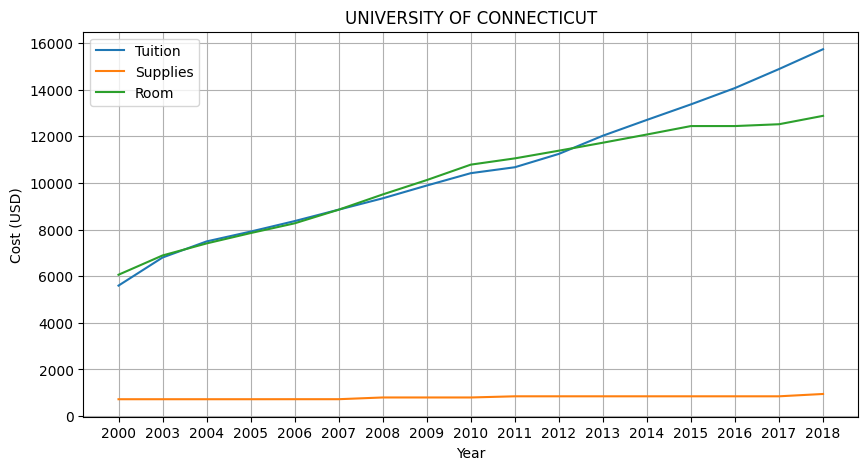

In [85]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()

plt.xlabel("Year")
plt.ylabel("Cost (USD)")


#plt.plot(tuition_db[tuition_db["name"] == "University of Connecticut".upper()], label = "Tuition")
university = "UNIVERSITY OF CONNECTICUT"
print(university)
plt.title(university)

def plot_db(db, university, label):
    plt.plot([str(x) for x in years], list(db[db["name"] == university].iloc[0, 1:])[1:], label = label)

plot_db(tuition_db, university, "Tuition")
plot_db(supplies_db, university, "Supplies")
plot_db(room_db, university, "Room")

#print(list(tuition_db[tuition_db["name"] == university].iloc[0, 1:]))


plt.grid()
plt.legend()
plt.show()